In [1]:
import datetime
today=f"{datetime.datetime.now():%Y-%m-%d_%H-%M}"
today

'2021-03-02_23-50'

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#imports
import pandas as pd
import pickle as pickle
from scipy.spatial.distance import cdist, pdist, squareform
#import backspinpy
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit  
from collections import defaultdict
from sklearn import preprocessing
import matplotlib.patches as mpatches
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Separated Annotation

In [10]:
cd /mnt/d/Dropbox/data/proj/PE_HYZ/PublicDataSet/Developmental_mouse brain/

/mnt/d/Dropbox/data/proj/PE_HYZ/PublicDataSet/Developmental_mouse brain


In [11]:
dfposi=pd.read_table("20201111_MouseBrainAtlas_SL_metaInfo.tab",index_col=0, header=0, sep="\t")

In [12]:
#dfposi=dfposi.iloc[-3:,:]

In [13]:
dfposi.head()

,Cluster,ClusterName,Region,PseudoAge,TSNE_X,TSNE_Y,UMAP_X,UMAP_Y,BTSNE_X,BTSNE_Y,UMAP3D_X,UMAP3D_Y,UMAP3D_Z
10X25_3_A_1:TTGGTACTGGGACAx,Neural_crest,634,Midbrain,9.505,-25.900671,-6.408116,6.208536,7.370287,-56.705326,-15.175609,2.873503,3.853158,-6.144522
10X27_3_A_1:TATCAGCTCTTGCCx,Neural_crest,634,Midbrain,9.540,-26.354128,-1.820086,5.459467,8.159930,-55.292125,-10.095811,1.731046,3.764495,-6.431027
10X27_3_A_1:AACCAGTGCTCAGAx,Neural_crest,634,Midbrain,9.930,-26.986095,-7.087025,6.572917,7.498238,-61.365980,-15.862534,3.126918,3.940230,-6.405674
10X27_3_A_1:CTAGTTTGCCTGAAx,Neural_crest,634,Midbrain,10.230,-27.583021,-6.904059,6.436008,7.521403,-62.872862,-14.369149,2.961187,4.019217,-6.277933
10X27_3_A_1:GTAGACTGGGATCTx,Neural_crest,634,Midbrain,10.635,-26.837190,-8.949903,6.671855,7.109936,-64.516093,-16.561974,3.474845,3.712845,-6.309426


In [14]:
dfpfcclus=dfposi.T.loc[["Cluster","TSNE_X","TSNE_Y"]]
dfpfcclus.shape

(3, 127326)

In [15]:
set(dfposi)

{'BTSNE_X',
 'BTSNE_Y',
 'Cluster',
 'ClusterName',
 'PseudoAge',
 'Region',
 'TSNE_X',
 'TSNE_Y',
 'UMAP3D_X',
 'UMAP3D_Y',
 'UMAP3D_Z',
 'UMAP_X',
 'UMAP_Y'}

In [16]:
proto = pd.Series({'Choroid plexus':'Choroid plexus',
 'Early Neural Tube': 'Neural_tube',
                    'Neural_tube': 'Neural_tube',
                   'Neural Tube': 'NT',
 'Ectoderm':'Ectoderm',
 'Fibroblast':'VLMC',
                   'VLMC':'VLMC',
                    'NT/Rgl': 'NT/Rgl',
 'Glia': 'Glia',
 'Neural crest': 'Neural_crest',
                    'Neural_crest': 'Neural_crest',
 'Neuron':'Neuron',
 'OPCs': 'OPCs',
 'Radial glia':  'Rgl',
                   'Rgl':'Rgl',
 'Vascular':'Pericyte/SMC',
                   'PeriV_Mural':'Pericyte/SMC',
                   'Pericyte/SMC':'Pericyte/SMC',
       })


posict_dev = dfposi['Cluster'].values
posiprotogruop = proto.loc[posict_dev].values
len(posiprotogruop)





127326

In [17]:
set(posiprotogruop)

{'Choroid plexus',
 'Ectoderm',
 'Glia',
 'Neural_crest',
 'Neural_tube',
 'Neuron',
 'OPCs',
 'Pericyte/SMC',
 'Rgl',
 'VLMC'}

In [18]:
dfposi['Cluster']=posiprotogruop

In [19]:
dfposi.head()

,Cluster,ClusterName,Region,PseudoAge,TSNE_X,TSNE_Y,UMAP_X,UMAP_Y,BTSNE_X,BTSNE_Y,UMAP3D_X,UMAP3D_Y,UMAP3D_Z
10X25_3_A_1:TTGGTACTGGGACAx,Neural_crest,634,Midbrain,9.505,-25.900671,-6.408116,6.208536,7.370287,-56.705326,-15.175609,2.873503,3.853158,-6.144522
10X27_3_A_1:TATCAGCTCTTGCCx,Neural_crest,634,Midbrain,9.540,-26.354128,-1.820086,5.459467,8.159930,-55.292125,-10.095811,1.731046,3.764495,-6.431027
10X27_3_A_1:AACCAGTGCTCAGAx,Neural_crest,634,Midbrain,9.930,-26.986095,-7.087025,6.572917,7.498238,-61.365980,-15.862534,3.126918,3.940230,-6.405674
10X27_3_A_1:CTAGTTTGCCTGAAx,Neural_crest,634,Midbrain,10.230,-27.583021,-6.904059,6.436008,7.521403,-62.872862,-14.369149,2.961187,4.019217,-6.277933
10X27_3_A_1:GTAGACTGGGATCTx,Neural_crest,634,Midbrain,10.635,-26.837190,-8.949903,6.671855,7.109936,-64.516093,-16.561974,3.474845,3.712845,-6.309426


In [20]:
set(dfposi['Cluster'])

{'Choroid plexus',
 'Ectoderm',
 'Glia',
 'Neural_crest',
 'Neural_tube',
 'Neuron',
 'OPCs',
 'Pericyte/SMC',
 'Rgl',
 'VLMC'}

In [21]:
mwanted_order =[
'Choroid plexus',
 'Ectoderm',
 'Glia',
 'Neural_crest',
 'Neural_tube',
 'Neuron',
 'OPCs',
 'Pericyte/SMC',
 'Rgl',
 'VLMC'
 ]
#mreorder_ix = [list(mclasses_names).index(i) for i in mwanted_order]
#mbool00 = in1d( mclasses_names[mclasses_index],  mwanted_order )
mcolor_dict = pd.Series({'Astro':( 123,104,238),  'VLMC':  (5, 75,5), 'Ectoderm': (108,49,13)  , 'Neuron':(0,191,255) ,
                          'Glia':   (128,0,128) ,
             'OPCs':    (255,215,0), 'Pericyte/SMC': (0, 215,   7)  , 'Rgl':    (255,0,0),
             'Choroid plexus':  (70, 70, 70),  'SMC': ( 80, 235, 255),'aaSMC':(139,69,19),
             'NC_auto':(10, 120, 190), 'Neural Tube':(230, 10, 100),'Neural_crest':  (128,128,0),
             'Meni_FB':   (190,  10,  10),'Meni_Neuron': (225, 160,  30),
                       'Meni_Rgl':    ( 159,155,110),
           'NC_Mes': (69,155,110)  ,'migratory 1': (215, 105,  30) , 'NC_Migr':  (190, 200, 190),'Neural_tube':   ( 255,20,147),
                         'qRgl':  (  10, 10, 250),'qNSC2': (215, 105,  30),'NC_sensory':  (79,47,79)   ,
              'NT/Rgl':    (170, 180, 170),})
mcolor_dict = mcolor_dict.map(lambda x: list(map(lambda y: y/255., x)))

In [22]:
mcolor_dict

Astro             [0.4823529411764706, 0.40784313725490196, 0.93...
VLMC              [0.0196078431372549, 0.29411764705882354, 0.01...
Ectoderm          [0.4235294117647059, 0.19215686274509805, 0.05...
Neuron                               [0.0, 0.7490196078431373, 1.0]
Glia                  [0.5019607843137255, 0.0, 0.5019607843137255]
OPCs                                 [1.0, 0.8431372549019608, 0.0]
Pericyte/SMC        [0.0, 0.8431372549019608, 0.027450980392156862]
Rgl                                                 [1.0, 0.0, 0.0]
Choroid plexus    [0.27450980392156865, 0.27450980392156865, 0.2...
SMC                   [0.3137254901960784, 0.9215686274509803, 1.0]
aaSMC             [0.5450980392156862, 0.27058823529411763, 0.07...
NC_auto           [0.0392156862745098, 0.47058823529411764, 0.74...
Neural Tube       [0.9019607843137255, 0.0392156862745098, 0.392...
Neural_crest          [0.5019607843137255, 0.5019607843137255, 0.0]
Meni_FB           [0.7450980392156863, 0.0392156

In [25]:
cd /mnt/d/Dropbox/data/proj/PE_HYZ/PublicDataSet/NBL_SZscRNA/20200714MergedAnalysis

/mnt/d/Dropbox/data/proj/PE_HYZ/PublicDataSet/NBL_SZscRNA/20200714MergedAnalysis


In [26]:
dfumapmerg=pd.read_table("2020-12-09_13-08_FinalTree_Plot_All_GBM_SkipNeuralEpiProg_WIthColor.tab", index_col =0 ,header=0, sep="\t")
dfumapmerg.shape

(4044, 7)

In [27]:
dfumapmerg.head()

,UMAP1,UMAP2,Cluster,Tree_X,Tree_Y,Group,Color
KI001-1773-030-091-A11,-12.721195,-24.898873,MS3,-11.425553,-22.965592,PeriC,#006400
KI014-1773-033-244-F10,-14.024730,-23.766608,MS3,-12.731296,-21.941349,PeriC,#006400
KI005-1773-030-107-D04,-12.725583,-20.869559,MS5,-13.227757,-21.639110,PeriC,#006400
KI021-1773-033-245-A09,-14.519182,-22.914120,MS5,-13.461634,-21.469798,PeriC,#006400
KI006-1773-017-081-H01,-15.027042,-23.412820,CL7_KI06,-13.585623,-21.467627,PeriC,#006400


In [28]:
dfumapmerg=dfumapmerg[["Group","Tree_X","Tree_Y","Color"]]
dfumapmerg.head()

,Group,Tree_X,Tree_Y,Color
KI001-1773-030-091-A11,PeriC,-11.425553,-22.965592,#006400
KI014-1773-033-244-F10,PeriC,-12.731296,-21.941349,#006400
KI005-1773-030-107-D04,PeriC,-13.227757,-21.639110,#006400
KI021-1773-033-245-A09,PeriC,-13.461634,-21.469798,#006400
KI006-1773-017-081-H01,PeriC,-13.585623,-21.467627,#006400


In [30]:
cd /mnt/d/Dropbox/Lab work/Project/GBM_Ready/201907Figures/Figure3/FateDecisioni

/mnt/d/Dropbox/Lab work/Project/GBM_Ready/201907Figures/Figure3/FateDecisioni


In [31]:
dfstem=pd.read_table("20200305_PE_GBM_Stem-like_Cells.tab",index_col=0,header=0,sep="\t")

In [33]:
dfstem.shape

(1532, 20)

In [34]:
dfumapmerg=dfumapmerg.loc[dfstem.index].dropna()
dfumapmerg.head()

,Group,Tree_X,Tree_Y,Color
KI003-1773-030-092-H11,PeriC,-19.563479,-16.726566,#228e00
KI003-1773-030-093-B01,De-lam,-7.443154,4.249898,#f51400
KI016-1773-033-195-F01,NB,2.041755,4.474571,#8d5572
KI006-1773-017-081-C04,Ast,-13.248859,15.248373,#a80058
KI016-1773-033-197-E06,NB,-0.597336,5.279345,#a64359


In [36]:
dfgbm = pd.read_table("/mnt/d/Dropbox/data/proj/PE_HYZ/PublicDataSet/GBMprim_UMI_WithCluster_New.tab", index_col =0 ,header=0, sep="\t")
dfgbm.shape

/root/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,

(20129, 4073)

dfgbm.tail()

In [37]:
dfumapmerg.columns=['Cluster', 'Tree_X', 'Tree_Y',"Color"]

dfumapmerg=dfumapmerg.join(dfgbm.iloc[-1,:].T,how="inner")
dfumapmerg.shape

In [38]:
set(dfumapmerg["Cluster"])

{'Ast', 'De-lam', 'NB', 'OPC', 'PeriC'}

In [46]:
mwanted_order =[
'Choroid plexus',
 'Ectoderm',
 'Glia',
 'Neural_crest',
 'Neural_tube',
 'Neuron',
 'OPCs',
 'Pericyte/SMC',
 'Rgl',
 'VLMC'
 ]
#mreorder_ix = [list(mclasses_names).index(i) for i in mwanted_order]
#mbool00 = in1d( mclasses_names[mclasses_index],  mwanted_order )
mcolor_dict = pd.Series({'Astro':( 123,104,238),  'VLMC':  (5, 75,5), 'Ectoderm': (108,49,13)  , 'Neuron':(0,191,255) ,
                          'Glia':   (128,0,128) ,
             'OPCs':    (255,215,0), 'Pericyte/SMC': (0, 215,   7)  , 'Rgl':    (255,0,0),
             'Choroid plexus':  (70, 70, 70),  'SMC': ( 80, 235, 255),'aaSMC':(139,69,19),
             'NC_auto':(10, 120, 190), 'Neural Tube':(230, 10, 100),'Neural_crest':  (128,128,0),
             'Meni_FB':   (190,  10,  10),'Meni_Neuron': (225, 160,  30),
                       'Meni_Rgl':    ( 159,155,110),
           'NC_Mes': (69,155,110)  ,'migratory 1': (215, 105,  30) , 'NC_Migr':  (190, 200, 190),'Neural_tube':   ( 255,20,147),
                         'qRgl':  (  10, 10, 250),'qNSC2': (215, 105,  30),'NC_sensory':  (79,47,79)   ,
              'NT/Rgl':    (170, 180, 170),})
mcolor_dict = mcolor_dict.map(lambda x: list(map(lambda y: y/255., x)))

In [47]:
wanted_orderclpn =['ASTRO', 'NB', 'NC_Peri', 'NT_STEM', 'OLIG']
#bool00clpn=array([True]*len(df_train_setclpn.columns))
#reorder_ixclpn = [list(classes_namesclpn).index(i) for i in wanted_orderclpn]
color_dictclpn = pd.Series({'CL1_KI09':  ( 10, 10, 250),'CL2_KI12': (215, 105,  30),'CL3_KI07':   (117, 245, 7) ,
              'PN1_KI15.12.08.01':    (111,111,111),'CL5_KI01': (79,47,79)  ,'PN2_KI15':    (180, 140, 130),
              'CL4_KI12':  (100, 180, 240),'MS8_KI16': ( 80, 235, 255),'CL6_KI03.07':(139,69,19),
              'CL7_KI06':(10, 120, 190),'CL8_KI16':(230, 10, 100),'NL1_KI15.12':  (120, 15,215),
            'MS1_KI24':   (190,  10,  10),'MS2_KI09': (225, 160,  30),'MS3':   (217, 245,   7) ,
            'MS4_KI09': (69,155,110)  ,'MS5':  (100, 100, 240),'MS6_KI17.05':  (190, 200, 190),'MS7_KI09':   ( 50, 180, 180),
                            'ASTRO':(120, 15,215), 'OLIG': (225, 160,  30),'NB':  ( 10, 10, 250), 'NT_STEM':   (190,  10,  10),'NC_Peri': (69,155,110) , 
                         'KI001':  (  10, 10, 250),'KI002': (215, 105,  30),'KI003':   ( 69,155,110) ,
              'KI005':    (170, 180, 170),'KI006': (100,100, 165)  ,'KI007':    (180, 140, 130),
              'KI008':  (100, 180, 240),'KI009': ( 80, 235, 255),'KI012':(190,  60,  10),
              'KI013':(10, 120, 190),'KI014':(230, 10, 100),'KI015':  (120, 15,215),
            'KI016':   (190,  10,  10),'KI017': (225, 160,  30),'KI020':   (217, 245,   7) ,
            'KI021': (117, 245,   7)  ,'KI023':  (111,111,111),'KI024':  ( 50, 180, 180)})
color_dictclpn = color_dictclpn.map(lambda x: list(map(lambda y: y/255., x)))
#newcolorsclpn = array(list(color_dictclpn[dfclpncol.ix[:,df_train_setclpn.columns].ix['Cluster']].values))


In [48]:
dfposi.head()

,Cluster,ClusterName,Region,PseudoAge,TSNE_X,TSNE_Y,UMAP_X,UMAP_Y,BTSNE_X,BTSNE_Y,UMAP3D_X,UMAP3D_Y,UMAP3D_Z
10X25_3_A_1:TTGGTACTGGGACAx,Neural_crest,634,Midbrain,9.505,-25.900671,-6.408116,6.208536,7.370287,-56.705326,-15.175609,2.873503,3.853158,-6.144522
10X27_3_A_1:TATCAGCTCTTGCCx,Neural_crest,634,Midbrain,9.540,-26.354128,-1.820086,5.459467,8.159930,-55.292125,-10.095811,1.731046,3.764495,-6.431027
10X27_3_A_1:AACCAGTGCTCAGAx,Neural_crest,634,Midbrain,9.930,-26.986095,-7.087025,6.572917,7.498238,-61.365980,-15.862534,3.126918,3.940230,-6.405674
10X27_3_A_1:CTAGTTTGCCTGAAx,Neural_crest,634,Midbrain,10.230,-27.583021,-6.904059,6.436008,7.521403,-62.872862,-14.369149,2.961187,4.019217,-6.277933
10X27_3_A_1:GTAGACTGGGATCTx,Neural_crest,634,Midbrain,10.635,-26.837190,-8.949903,6.671855,7.109936,-64.516093,-16.561974,3.474845,3.712845,-6.309426


In [53]:
dfumapmerg.shape

(1532, 4)

# Velocity

In [87]:
import pandas as pd
import loompy
import getopt
import sys
import os
import pandas as pd

In [88]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import loompy
import velocyto as vcy
import logging
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.interpolate import interp1d

logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
%matplotlib inline
plt.rcParams['pdf.fonttype'] = 42

2021-03-02 14:02:04,619 - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [89]:
# plotting utility functions
def despline():
    ax1 = plt.gca()
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')
    
def minimal_xticks(start, end):
    end_ = np.around(end, -int(np.log10(end))+1)
    xlims = np.linspace(start, end_, 5)
    xlims_tx = [""]*len(xlims)
    xlims_tx[0], xlims_tx[-1] = f"{xlims[0]:.0f}", f"{xlims[-1]:.02f}"
    plt.xticks(xlims, xlims_tx)

    
def minimal_yticks(start, end):
    end_ = np.around(end, -int(np.log10(end))+1)
    ylims = np.linspace(start, end_, 5)
    ylims_tx = [""]*len(ylims)
    ylims_tx[0], ylims_tx[-1] = f"{ylims[0]:.0f}", f"{ylims[-1]:.02f}"
    plt.yticks(ylims, ylims_tx)

In [90]:
def ixs_thatsort_a2b(a: np.ndarray, b: np.ndarray, check_content: bool=True) -> np.ndarray:
    "This is super duper magic sauce to make the order of one list to be like another"
    if check_content:
        assert len(np.intersect1d(a, b)) == len(a), f"The two arrays are not matching"
    return np.argsort(a)[np.argsort(np.argsort(b))]

def despline():
    ax1 = plt.gca()
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

In [91]:
dp = dict(min_expr_counts=8,
          min_cells_express=2,
          N=1500,
          min_expr_counts_U=4,
          min_cells_express_U=3,
          min_avg_U=0.008,
          min_avg_S=0.08,
          n_comps = 20,
          limit_gamma=False,
          fit_offset=False,
          n_neighbors = 30,
          k = 50)

In [92]:
!mkdir data

In [93]:
from urllib.request import urlretrieve
urlretrieve("http://pklab.med.harvard.edu/velocyto/Haber_et_al/goatools_cellcycle_genes.txt",
            "data/goatools_cellcycle_genes.txt")

('data/goatools_cellcycle_genes.txt',
 <http.client.HTTPMessage at 0x7f78192b9ef0>)

In [96]:
pwd

'/mnt/d/Dropbox/Lab work/Project/GBM_Ready/201907Figures/Figure3/FateDecisioni'

In [97]:
# Crate an analysis object
vlm = vcy.VelocytoLoom("/mnt/d/Dropbox/data/proj/PE_HYZ/PublicDataSet/PE_gbm/20210302_nonhead_NN_New_mDG_GBMFinal_DevMouseBrain_OnlyStemCell.loom")  # CHANGE THIS PATH TO YOUR LOCAL PATH

In [98]:
vlm.ra["Gene"][1:10]

array(['MIR6859-1', 'FAM138A', 'AL627309.1', 'AL627309.3', 'AL627309.6',
       'AL627309.7', 'AL627309.2', 'AL627309.5', 'RNU6-1100P'],
      dtype=object)

In [99]:
vlm.ca.keys()

dict_keys(['CellID', 'Cluster', 'PatientID', 'UMAP3', 'UMAP_x', 'UMAP_y', 'UMAP_z', 'Valid', 'WP_x', 'WP_y'])

In [100]:
vlm.ca['Valid'][:10]

array(['NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES'],
      dtype=object)

In [101]:
set(vlm.ca['Valid'])

{'NO', 'YES'}

In [102]:
set(vlm.ca["Cluster"])

{'Ast', 'De-lam', 'NB', 'NONE', 'OPC', 'PeriC'}

In [103]:
vlm.filter_cells(np.in1d(vlm.ca['Valid'], ["YES"]))

In [104]:
set(vlm.ca["Cluster"])

{'Ast', 'De-lam', 'NB', 'NONE', 'OPC', 'PeriC'}

In [105]:
vlm.filter_cells(~np.in1d(vlm.ca['Cluster'], ['NONE','CD45+']))

In [106]:
set(vlm.ca["Cluster"])

{'Ast', 'De-lam', 'NB', 'OPC', 'PeriC'}

In [107]:
vlm.filter_cells(np.in1d(vlm.ca['Cluster'], ['Ast', 'De-lam', 'NB', 'NONE', 'OPC', 'PeriC']))

In [108]:
np.in1d(vlm.ca['Valid'], ["YES"])

array([ True,  True,  True, ...,  True,  True,  True])

vlm.shape

In [109]:
vlm.ca["Valid"]

array(['YES', 'YES', 'YES', ..., 'YES', 'YES', 'YES'], dtype=object)

In [110]:
set(vlm.ca["Cluster"])

{'Ast', 'De-lam', 'NB', 'OPC', 'PeriC'}

# Extra filtering

## Remove low detection

Text(0, 0.5, 'unspliced')

2021-03-02 14:03:47,888 - DEBUG - update_title_pos
2021-03-02 14:03:47,970 - DEBUG - update_title_pos
2021-03-02 14:03:48,031 - DEBUG - update_title_pos
2021-03-02 14:03:48,063 - DEBUG - update_title_pos


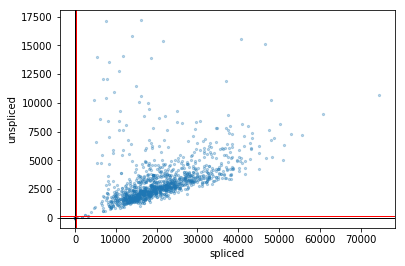

In [111]:
plt.scatter(vlm.initial_cell_size, vlm.initial_Ucell_size, alpha=0.3, s=5)
plt.axvline(300, c="r", lw=1)
plt.axvline(np.percentile(vlm.initial_cell_size, 1), c="k", lw=1)
plt.axhline(200, c="r", lw=1)
plt.axhline(np.percentile(vlm.initial_Ucell_size, 1), c="k", lw=1)
plt.xlabel("spliced"); plt.ylabel("unspliced")

In [112]:
vlm.filter_cells(bool_array=(vlm.initial_Ucell_size > 200) & (vlm.initial_cell_size > 200))

## Merge some labels

In [113]:
set(vlm.ca["Cluster"])

{'Ast', 'De-lam', 'NB', 'OPC', 'PeriC'}

# Read column attributes form the loom file and specify colors
colors_dict = {#'CL1_KI09':np.array([137, 34, 81]),
 #'CL2_KI12':np.array([30, 162, 209]),
 #'CL3_KI07':np.array([224, 139, 183]),
 #'CL4_KI12':np.array([52, 127, 184]),
#'CL5_KI01':np.array([50, 81, 156]),
'MS1_KI24':np.array([107, 194, 165]),
'MS2_KI09':np.array([225,34,46]),
 'MS3':np.array([190,190,190]),
 'MS4_KI09':np.array([37,139,72]),
  'MS5':np.array([249,214,64]),
  'MS6_KI17.05':np.array([164,209,235]),
  'MS7_KI09':np.array([223,127,49]),
  #'NL1_KI15.12':np.array([164,87,44]),
    #'PN1_KI16':np.array([194,67,14]),
 #'PN2_KI03.07':np.array([235,64,196]),
 #'PN3_KI06':np.array([105,164,216]),
 #'PN4_KI16':np.array([15,104,36]),
  'PN5_KI15.12.08.01':np.array([224, 139, 104]),
#'PN6_KI15':np.array([96, 97, 96])}
colors_dict = {k:v/256 for k, v in colors_dict.items()}
#vlm.ca["Celltype"][np.in1d(vlm.ca["Celltype"], ["TA.G1", "TA.G2"])] = "TA"
vlm.set_clusters(vlm.ca["Cluster"], cluster_colors_dict=colors_dict)

In [114]:
# Read column attributes form the loom file and specify colors
colors_dict = { 
  'De-lam':   np.array([190,  10,  10]),
    'OPC': np.array([225, 160,  30]),
 
 'PeriC':   np.array([69,155,110]),
   'Ast':  np.array([100, 100, 240]),
  
   'NB':np.array([ 80, 235, 255])}
colors_dict = {k:v/256 for k, v in colors_dict.items()}
#vlm.ca["Celltype"][np.in1d(vlm.ca["Celltype"], ["TA.G1", "TA.G2"])] = "TA"
vlm.set_clusters(vlm.ca["Cluster"], cluster_colors_dict=colors_dict)

2021-03-02 14:04:06,295 - WARNING - 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2021-03-02 14:04:06,301 - WARNING - 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2021-03-02 14:04:06,305 - WARNING - 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2021-03-02 14:04:06,313 - WARNING - 'c' arg

(0.8, 2.0, -4.0, 10.0)

2021-03-02 14:04:06,340 - DEBUG - update_title_pos
2021-03-02 14:04:06,350 - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=7.0 to DejaVu Sans ('/root/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
2021-03-02 14:04:06,392 - DEBUG - update_title_pos
2021-03-02 14:04:06,417 - DEBUG - update_title_pos
2021-03-02 14:04:06,428 - DEBUG - update_title_pos


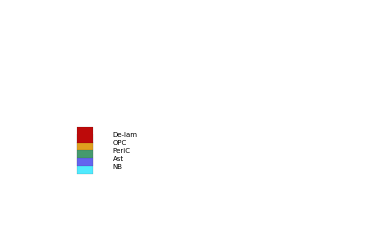

In [115]:
for zz, (k, v) in enumerate(list(colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0.1, edgecolor="k", s=250)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":7})
plt.xlim(0.8,2)
plt.ylim(-4,10)
plt.axis("off")

In [116]:
dict(zip(*np.unique(vlm.ca["Cluster"], return_counts=1))) 

{'Ast': 198, 'De-lam': 91, 'NB': 67, 'OPC': 77, 'PeriC': 787}

In [118]:
cellamount_dict = {
'Ast': 198, 'De-lam': 91, 'NB': 67, 'OPC': 77, 'PeriC': 787}

In [119]:
dict(zip(*np.unique(vlm.ca["Cluster"], return_counts=1))) ==cellamount_dict

True

# Downsample cells

In [120]:
from scipy.stats.mstats import gmean, hmean

In [121]:
#tosample = int(np.ceil(np.mean(np.unique(vlm.ca["Cluster"], return_counts=1)[1]))*3.5)
#tosample = int(np.sum(np.unique(vlm.ca["Cluster"], return_counts=1)[1])/(len(cellamount_dict)))
tosample = int(np.sum(np.unique(vlm.ca["Cluster"], return_counts=1)[1]))
np.random.seed(39900715)
downsaple_ixs = []
for ct in np.unique(vlm.ca["Cluster"]):
    ixs = np.where(vlm.ca["Cluster"] == ct)[0]
    downsaple_ixs.append(np.random.choice(ixs, min(tosample, len(ixs)), replace=False))
downsaple_ixs = np.concatenate(downsaple_ixs)
len(downsaple_ixs)

1220

In [122]:
len(cellamount_dict)

5

In [123]:
int(np.ceil(np.mean(np.unique(vlm.ca["Cluster"], return_counts=1)[1])))

244

In [124]:
np.unique(vlm.ca["Cluster"])

array(['Ast', 'De-lam', 'NB', 'OPC', 'PeriC'], dtype=object)

In [125]:
vlm.filter_cells(bool_array=np.in1d(np.arange(vlm.S.shape[1]), downsaple_ixs))

# Diagnostics

vlm.plot_fractions()

In [126]:
dfgbm.tail()

,KI009-1772-122-307-D03,KI009-1772-122-307-F03,KI009-1772-122-307-H04,KI009-1772-122-307-E12,KI009-1772-122-308-D03,KI009-1772-122-308-A08,KI009-1772-122-308-C08,KI009-1772-122-308-G09,KI009-1772-122-308-G10,KI009-1772-122-308-H10,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
CDY1-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPRY3-loc2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
VAMP7-loc1,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,2,0,0,1,0,0
IL9R-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cluster,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,...,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09


In [127]:
dfgbm=dfgbm.iloc[:-1,:].astype(int)
dfgbm.shape

(20128, 4073)

In [128]:
dfgbm.tail()

,KI009-1772-122-307-D03,KI009-1772-122-307-F03,KI009-1772-122-307-H04,KI009-1772-122-307-E12,KI009-1772-122-308-D03,KI009-1772-122-308-A08,KI009-1772-122-308-C08,KI009-1772-122-308-G09,KI009-1772-122-308-G10,KI009-1772-122-308-H10,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
BPY2-loc3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CDY1-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPRY3-loc2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
VAMP7-loc1,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,2,0,0,1,0,0
IL9R-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
dftest=dfgbm.loc[dfgbm.sum(1)>0]
dftest.shape

(17428, 4073)

In [130]:
backup=vlm
len(backup.ra["Gene"])

58395

In [131]:
vlm=backup
len(vlm.ra["Gene"])

58395

In [132]:
vlm.filter_genes(by_custom_array=~np.in1d(vlm.ra["Gene"], cell_cycle_genes))

2021-03-02 14:04:47,523 - DEBUG - Filtering by custom boolean array


In [133]:
vlm.filter_genes(by_custom_array=np.in1d(vlm.ra['Gene'], dfgbm.index.tolist()))
len(vlm.ra["Gene"])

2021-03-02 14:05:09,550 - DEBUG - Filtering by custom boolean array


16048

In [134]:
vlm.score_detection_levels(min_expr_counts=0, min_cells_express=0,
                           min_expr_counts_U=dp["min_expr_counts_U"], min_cells_express_U=dp["min_cells_express_U"])
vlm.score_cluster_expression(min_avg_U=dp["min_avg_U"], min_avg_S=dp["min_avg_S"])
vlm.filter_genes(by_detection_levels=True, by_cluster_expression=True)

2021-03-02 14:05:09,955 - INFO - Cluster: b'Ast' (198 cells)
2021-03-02 14:05:10,048 - INFO - Cluster: b'De-lam' (91 cells)
2021-03-02 14:05:10,083 - INFO - Cluster: b'NB' (67 cells)
2021-03-02 14:05:10,112 - INFO - Cluster: b'OPC' (77 cells)
2021-03-02 14:05:10,142 - INFO - Cluster: b'PeriC' (787 cells)
2021-03-02 14:05:10,524 - DEBUG - Filtering by cluster expression
2021-03-02 14:05:10,525 - DEBUG - Filtering by detection level


In [135]:
len(vlm.ra["Gene"])

8653

In [136]:
combined_size = (vlm.S.sum(0) / np.percentile(vlm.S.sum(0), 95)) + (vlm.initial_cell_size / np.percentile(vlm.initial_cell_size, 95))
combined_Usize = (vlm.U.sum(0) / np.percentile(vlm.U.sum(0), 95)) + (vlm.initial_Ucell_size / np.percentile(vlm.initial_Ucell_size, 95))
vlm._normalize_S(relative_size=0.25*combined_size*np.median(vlm.S.sum(0)),
                 target_size=np.median(vlm.S.sum(0)))
vlm._normalize_U(relative_size=0.5*combined_Usize*np.median(vlm.U.sum(0)),
                 target_size=np.median(vlm.U.sum(0)))

6

2021-03-02 14:05:18,765 - DEBUG - update_title_pos
2021-03-02 14:05:18,820 - DEBUG - update_title_pos
2021-03-02 14:05:18,857 - DEBUG - update_title_pos
2021-03-02 14:05:18,881 - DEBUG - update_title_pos


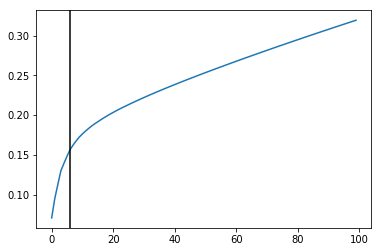

In [137]:
vlm.perform_PCA()
plt.plot(np.cumsum(vlm.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(vlm.pca.explained_variance_ratio_))>0.0055))[0][0]
plt.axvline(n_comps, c="k"); n_comps

Text(0, 0.5, 'PC5')

2021-03-02 14:05:19,126 - DEBUG - update_title_pos
2021-03-02 14:05:19,191 - DEBUG - update_title_pos
2021-03-02 14:05:19,249 - DEBUG - update_title_pos
2021-03-02 14:05:19,291 - DEBUG - update_title_pos
2021-03-02 14:05:19,430 - DEBUG - update_title_pos
2021-03-02 14:05:19,464 - DEBUG - update_title_pos
2021-03-02 14:05:19,488 - DEBUG - update_title_pos
2021-03-02 14:05:19,540 - DEBUG - update_title_pos
2021-03-02 14:05:19,627 - DEBUG - update_title_pos
2021-03-02 14:05:19,661 - DEBUG - update_title_pos
2021-03-02 14:05:19,706 - DEBUG - update_title_pos
2021-03-02 14:05:19,734 - DEBUG - update_title_pos
2021-03-02 14:05:19,758 - DEBUG - update_title_pos
2021-03-02 14:05:19,812 - DEBUG - update_title_pos
2021-03-02 14:05:19,903 - DEBUG - update_title_pos
2021-03-02 14:05:19,965 - DEBUG - update_title_pos


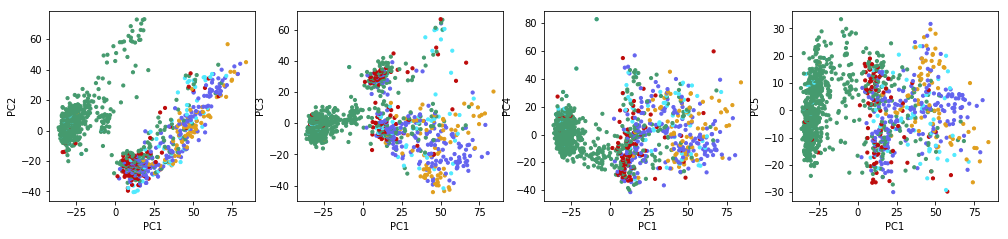

In [138]:
plt.figure(None, (17,3.5))
plt.subplot(141)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,1], c=vlm.colorandum,s=10)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.subplot(142)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,2], c=vlm.colorandum,s=10)
plt.xlabel("PC1"); plt.ylabel("PC3")
plt.subplot(143)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,3], c=vlm.colorandum,s=10)
plt.xlabel("PC1"); plt.ylabel("PC4")
plt.subplot(144)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,4], c=vlm.colorandum,s=10)
plt.xlabel("PC1"); plt.ylabel("PC5")

import cytograph

In [139]:
pwd

'/mnt/d/Dropbox/Lab work/Project/GBM_Ready/201907Figures/Figure3/FateDecisioni'

In [140]:
# before run cytograph, you must set the following:
#export PATH=/home/huyiz/anaconda3/envs/newpy36/lib/python3.6/site-packages/cytograph/bhtsne:$PATH 
#export PATH=/home/huyiz/anaconda3/envs/newpy36/lib/python3.6/site-packages/cytograph/bhtsne/bh_tsne:$PATH
#echo 'export /home/huyiz/anaconda3/envs/newpy36/lib/python3.6/site-packages/cytograph/bhtsne:$PATH' >>~/.bash_profile
#echo 'export /home/huyiz/anaconda3/envs/newpy36/lib/python3.6/site-packages/cytograph/bhtsne/bh_tsne:$PATH' >>~/.bash_profile

# Perplexity150,PC19

In [141]:
vlm.ca.keys()

dict_keys(['CellID', 'Cluster', 'PatientID', 'UMAP3', 'UMAP_x', 'UMAP_y', 'UMAP_z', 'Valid', 'WP_x', 'WP_y'])

In [142]:
ts=np.array([vlm.ca['WP_x'].astype(float).tolist(),vlm.ca['WP_y'].astype(float).tolist()])
ts=ts.T
len(ts)

1220

ts = cytograph.TSNE(perplexity=200).layout(vlm.pcs[:,:40])
plt.figure(None,(8,8))
vcy.scatter_viz(ts[:,0], ts[:,1], c=vlm.colorandum, s=10)

In [143]:
vlm.ts = ts

In [144]:
vlm.ts[:,0]

array([ -9.27303246,  -6.35246618,  -6.32628072, ..., -11.75026395,
       -22.27923919, -22.38630988])

ts = cytograph.TSNE(perplexity=300).layout(vlm.pcs[:,:40])
plt.figure(None,(8,8))
vcy.scatter_viz(ts[:,0], ts[:,1], c=vlm.colorandum, s=10)

2021-03-02 14:05:27,796 - DEBUG - update_title_pos
2021-03-02 14:05:27,957 - DEBUG - update_title_pos
2021-03-02 14:05:28,011 - DEBUG - update_title_pos
2021-03-02 14:05:28,035 - DEBUG - update_title_pos


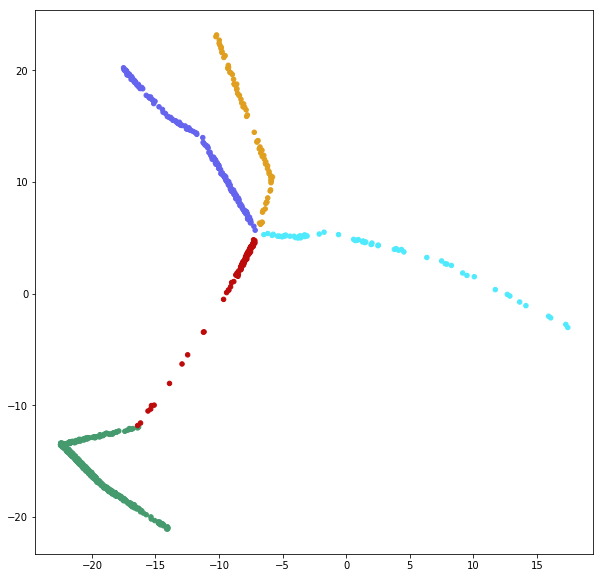

In [145]:

# Plot TSNE# Plot  
plt.figure(figsize=(10,10))
vcy.scatter_viz(vlm.ts[:,0], vlm.ts[:,1], c=vlm.colorandum, s=20)

# K50pcddim10

In [146]:
k = dp["k"] = 300
vlm.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*4, b_maxl=int(k*3), n_jobs=2)
vlm.fit_gammas(limit_gamma=False, fit_offset=True)

2021-03-02 14:05:44,959 - DEBUG - First search the 1200 nearest neighbours for 1220
2021-03-02 14:05:45,406 - DEBUG - Using the initialization network to find a 300-NN graph with maximum connectivity of 900
2021-03-02 14:05:45,446 - DEBUG - Returning sparse matrix


In [147]:
vlm.predict_U()
vlm.calculate_velocity()
vlm.calculate_shift(assumption="constant_unspliced", delta_t=5)
vlm.extrapolate_cell_at_t(delta_t=5)

In [148]:
len(vlm.ts[:,1])

1220

In [149]:
vlm.estimate_transition_prob(hidim="Sx_sz", embed="ts", transform="sqrt", psc=1,
                             n_neighbors=300, knn_random=True, sampled_fraction=0.2, calculate_randomized=True)

2021-03-02 14:06:40,975 - DEBUG - label 0:
    value = arg(0, name=value)               ['value']
    $0.1 = global(np: <module 'numpy' from '/root/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/__init__.py'>) ['$0.1']
    $0.2 = getattr(value=$0.1, attr=random)  ['$0.1', '$0.2']
    $0.3 = getattr(value=$0.2, attr=seed)    ['$0.2', '$0.3']
    $0.5 = call $0.3(value, func=$0.3, args=[Var(value, analysis.py:2415)], kws=(), vararg=None) ['$0.3', '$0.5', 'value']
    $const0.6 = const(NoneType, None)        ['$const0.6']
    $0.7 = cast(value=$const0.6)             ['$0.7', '$const0.6']
    return $0.7                              ['$0.7']

2021-03-02 14:06:40,981 - DEBUG - ==== SSA block analysis pass on 0
2021-03-02 14:06:40,984 - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7f77a68696d8>
2021-03-02 14:06:40,988 - DEBUG - on stmt: value = arg(0, name=value)
2021-03-02 14:06:40,990 - DEBUG - on stmt: $0.1 = global(np: <module 'numpy' from '/root/anaconda3/envs/p

2021-03-02 14:06:41,415 - DEBUG - on stmt: jump 16
2021-03-02 14:06:41,417 - DEBUG - ==== SSA block analysis pass on 16
2021-03-02 14:06:41,418 - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7f779db69dd8>
2021-03-02 14:06:41,419 - DEBUG - on stmt: jump 18
2021-03-02 14:06:41,421 - DEBUG - ==== SSA block analysis pass on 18
2021-03-02 14:06:41,423 - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7f779db69dd8>
2021-03-02 14:06:41,424 - DEBUG - on stmt: $18.1 = global(range: <class 'range'>)
2021-03-02 14:06:41,425 - DEBUG - on stmt: $18.3 = getattr(value=A, attr=shape)
2021-03-02 14:06:41,427 - DEBUG - on stmt: $const18.4 = const(int, 0)
2021-03-02 14:06:41,428 - DEBUG - on stmt: $18.5 = static_getitem(value=$18.3, index=0, index_var=$const18.4)
2021-03-02 14:06:41,430 - DEBUG - on stmt: $18.6 = call $18.1($18.5, func=$18.1, args=[Var($18.5, analysis.py:2423)], kws=(), vararg=None)
2021-03-02 14:06:41,431 - DEBUG - on stmt: $18.7 = getiter(value=$18.6)
2

2021-03-02 14:06:41,486 - DEBUG - SSA violators set()
2021-03-02 14:06:41,506 - DEBUG - label 0:
    arr = arg(0, name=arr)                   ['arr']
    $0.2 = getattr(value=arr, attr=shape)    ['$0.2', 'arr']
    $const0.3 = const(int, 0)                ['$const0.3']
    $0.4 = getitem(value=$0.2, index=$const0.3) ['$0.2', '$0.4', '$const0.3']
    $const0.5 = const(int, 1)                ['$const0.5']
    $0.6 = $0.4 - $const0.5                  ['$0.4', '$0.6', '$const0.5']
    i = $0.6                                 ['$0.6', 'i']
    jump 16                                  []
label 16:
    jump 18                                  []
label 18:
    $const18.2 = const(int, 0)               ['$const18.2']
    $18.3 = i > $const18.2                   ['$18.3', '$const18.2', 'i']
    bool24 = global(bool: <class 'bool'>)    ['bool24']
    $24pred = call bool24($18.3, func=bool24, args=(Var($18.3, randomimpl.py:1209),), kws=(), vararg=None) ['$18.3', '$24pred', 'bool24']
    branch $24p

2021-03-02 14:06:41,598 - DEBUG - on stmt: $const0.5 = const(int, 1)
2021-03-02 14:06:41,599 - DEBUG - on stmt: $0.6 = $0.4 - $const0.5
2021-03-02 14:06:41,600 - DEBUG - on stmt: i = $0.6
2021-03-02 14:06:41,601 - DEBUG - first assign: i
2021-03-02 14:06:41,602 - DEBUG - replaced with: i = $0.6
2021-03-02 14:06:41,603 - DEBUG - on stmt: jump 16
2021-03-02 14:06:41,605 - DEBUG - ==== SSA block rewrite pass on 16
2021-03-02 14:06:41,606 - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7f779db87400>
2021-03-02 14:06:41,607 - DEBUG - on stmt: jump 18
2021-03-02 14:06:41,608 - DEBUG - ==== SSA block rewrite pass on 18
2021-03-02 14:06:41,609 - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7f779db87400>
2021-03-02 14:06:41,609 - DEBUG - on stmt: $const18.2 = const(int, 0)
2021-03-02 14:06:41,610 - DEBUG - on stmt: $18.3 = i > $const18.2
2021-03-02 14:06:41,611 - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)
2021-03-02 14:06:41,612 - DEBUG - on stmt: $24p

2021-03-02 14:06:41,704 - DEBUG - replaced with: $26.18 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=i.2, rhs=$const26.17, static_lhs=Undefined, static_rhs=Undefined)
2021-03-02 14:06:41,705 - DEBUG - on stmt: i.1 = $26.18
2021-03-02 14:06:41,705 - DEBUG - on stmt: jump 18
2021-03-02 14:06:41,706 - DEBUG - ==== SSA block rewrite pass on 74
2021-03-02 14:06:41,707 - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7f779db12fd0>
2021-03-02 14:06:41,707 - DEBUG - on stmt: jump 76
2021-03-02 14:06:41,708 - DEBUG - ==== SSA block rewrite pass on 76
2021-03-02 14:06:41,709 - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7f779db12fd0>
2021-03-02 14:06:41,710 - DEBUG - on stmt: $const76.1 = const(NoneType, None)
2021-03-02 14:06:41,711 - DEBUG - on stmt: $76.2 = cast(value=$const76.1)
2021-03-02 14:06:41,712 - DEBUG - on stmt: return $76.2
2021-03-02 14:06:41,831 - DEBUG - label 0:
    a = arg(0, name=a)                       ['a']
   

2021-03-02 14:06:41,852 - DEBUG - on stmt: a = arg(0, name=a)
2021-03-02 14:06:41,854 - DEBUG - on stmt: size = arg(1, name=size)
2021-03-02 14:06:41,856 - DEBUG - on stmt: replace = arg(2, name=replace)
2021-03-02 14:06:41,858 - DEBUG - on stmt: $0.1 = freevar(get_source_size: <function choice.<locals>.get_source_size at 0x7f77a5036c80>)
2021-03-02 14:06:41,860 - DEBUG - on stmt: $0.3 = call $0.1(a, func=$0.1, args=[Var(a, randomimpl.py:1401)], kws=(), vararg=None)
2021-03-02 14:06:41,862 - DEBUG - on stmt: n = $0.3
2021-03-02 14:06:41,865 - DEBUG - on stmt: bool12 = global(bool: <class 'bool'>)
2021-03-02 14:06:41,867 - DEBUG - on stmt: $12pred = call bool12(replace, func=bool12, args=(Var(replace, randomimpl.py:1401),), kws=(), vararg=None)
2021-03-02 14:06:41,868 - DEBUG - on stmt: branch $12pred, 14, 86
2021-03-02 14:06:41,869 - DEBUG - ==== SSA block analysis pass on 14
2021-03-02 14:06:41,870 - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7f779dafcba8>
2021-03-

2021-03-02 14:06:41,957 - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7f779dafcba8>
2021-03-02 14:06:41,958 - DEBUG - on stmt: $136.1 = global(range: <class 'range'>)
2021-03-02 14:06:41,959 - DEBUG - on stmt: $136.2 = global(len: <built-in function len>)
2021-03-02 14:06:41,960 - DEBUG - on stmt: $136.4 = call $136.2(fl, func=$136.2, args=[Var(fl, randomimpl.py:1404)], kws=(), vararg=None)
2021-03-02 14:06:41,961 - DEBUG - on stmt: $136.5 = call $136.1($136.4, func=$136.1, args=[Var($136.4, randomimpl.py:1423)], kws=(), vararg=None)
2021-03-02 14:06:41,962 - DEBUG - on stmt: $136.6 = getiter(value=$136.5)
2021-03-02 14:06:41,963 - DEBUG - on stmt: $phi148.1 = $136.6
2021-03-02 14:06:41,964 - DEBUG - on stmt: jump 148
2021-03-02 14:06:41,964 - DEBUG - ==== SSA block analysis pass on 148
2021-03-02 14:06:41,965 - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7f779dafcba8>
2021-03-02 14:06:41,967 - DEBUG - on stmt: $148.2 = iternext(value=$phi148.1)
20

2021-03-02 14:06:41,997 - DEBUG - on stmt: $0.3 = call $0.1(a, func=$0.1, args=[Var(a, randomimpl.py:1401)], kws=(), vararg=None)
2021-03-02 14:06:41,998 - DEBUG - on stmt: n = $0.3
2021-03-02 14:06:41,999 - DEBUG - on stmt: bool12 = global(bool: <class 'bool'>)
2021-03-02 14:06:41,999 - DEBUG - on stmt: $12pred = call bool12(replace, func=bool12, args=(Var(replace, randomimpl.py:1401),), kws=(), vararg=None)
2021-03-02 14:06:42,001 - DEBUG - on stmt: branch $12pred, 14, 86
2021-03-02 14:06:42,001 - DEBUG - ==== SSA block rewrite pass on 14
2021-03-02 14:06:42,002 - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7f779dafcba8>
2021-03-02 14:06:42,003 - DEBUG - on stmt: $14.1 = global(np: <module 'numpy' from '/root/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/__init__.py'>)
2021-03-02 14:06:42,003 - DEBUG - on stmt: $14.2 = getattr(value=$14.1, attr=empty)
2021-03-02 14:06:42,005 - DEBUG - on stmt: $14.4 = freevar(dtype: int64)
2021-03-02 14:06:42,006 - DEBUG - on

2021-03-02 14:06:42,088 - DEBUG - on stmt: $136.2 = global(len: <built-in function len>)
2021-03-02 14:06:42,089 - DEBUG - on stmt: $136.4 = call $136.2(fl, func=$136.2, args=[Var(fl, randomimpl.py:1404)], kws=(), vararg=None)
2021-03-02 14:06:42,089 - DEBUG - on stmt: $136.5 = call $136.1($136.4, func=$136.1, args=[Var($136.4, randomimpl.py:1423)], kws=(), vararg=None)
2021-03-02 14:06:42,090 - DEBUG - on stmt: $136.6 = getiter(value=$136.5)
2021-03-02 14:06:42,091 - DEBUG - on stmt: $phi148.1 = $136.6
2021-03-02 14:06:42,092 - DEBUG - on stmt: jump 148
2021-03-02 14:06:42,093 - DEBUG - ==== SSA block rewrite pass on 148
2021-03-02 14:06:42,093 - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7f779dafcba8>
2021-03-02 14:06:42,094 - DEBUG - on stmt: $148.2 = iternext(value=$phi148.1)
2021-03-02 14:06:42,095 - DEBUG - on stmt: $148.3 = pair_first(value=$148.2)
2021-03-02 14:06:42,096 - DEBUG - on stmt: $148.4 = pair_second(value=$148.2)
2021-03-02 14:06:42,099 - DEBUG - on

2021-03-02 14:06:42,185 - DEBUG - idom 34 from label 46
2021-03-02 14:06:42,186 - DEBUG - find_def_from_bottom label 34
2021-03-02 14:06:42,187 - DEBUG - find_def_from_top label 34
2021-03-02 14:06:42,188 - DEBUG - idom 32 from label 34
2021-03-02 14:06:42,188 - DEBUG - find_def_from_bottom label 32
2021-03-02 14:06:42,189 - DEBUG - find_def_from_top label 32
2021-03-02 14:06:42,190 - DEBUG - idom 14 from label 32
2021-03-02 14:06:42,192 - DEBUG - find_def_from_bottom label 14
2021-03-02 14:06:42,192 - DEBUG - on stmt: return $82.2
2021-03-02 14:06:42,194 - DEBUG - ==== SSA block rewrite pass on 86
2021-03-02 14:06:42,194 - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7f779db0d4a8>
2021-03-02 14:06:42,195 - DEBUG - on stmt: $86.1 = global(np: <module 'numpy' from '/root/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/__init__.py'>)
2021-03-02 14:06:42,196 - DEBUG - on stmt: $86.2 = getattr(value=$86.1, attr=empty)
2021-03-02 14:06:42,200 - DEBUG - on stmt: $86.4 = free

2021-03-02 14:06:42,300 - DEBUG - on stmt: $0.3 = call $0.1(a, func=$0.1, args=[Var(a, randomimpl.py:1401)], kws=(), vararg=None)
2021-03-02 14:06:42,301 - DEBUG - on stmt: n = $0.3
2021-03-02 14:06:42,301 - DEBUG - on stmt: bool12 = global(bool: <class 'bool'>)
2021-03-02 14:06:42,302 - DEBUG - on stmt: $12pred = call bool12(replace, func=bool12, args=(Var(replace, randomimpl.py:1401),), kws=(), vararg=None)
2021-03-02 14:06:42,303 - DEBUG - on stmt: branch $12pred, 14, 86
2021-03-02 14:06:42,304 - DEBUG - ==== SSA block rewrite pass on 14
2021-03-02 14:06:42,305 - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7f779db0e2e8>
2021-03-02 14:06:42,305 - DEBUG - on stmt: $14.1 = global(np: <module 'numpy' from '/root/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/__init__.py'>)
2021-03-02 14:06:42,306 - DEBUG - on stmt: $14.2 = getattr(value=$14.1, attr=empty)
2021-03-02 14:06:42,307 - DEBUG - on stmt: $14.4 = freevar(dtype: int64)
2021-03-02 14:06:42,308 - DEBUG - on

2021-03-02 14:06:42,396 - DEBUG - on stmt: $136.2 = global(len: <built-in function len>)
2021-03-02 14:06:42,397 - DEBUG - on stmt: $136.4 = call $136.2(fl, func=$136.2, args=[Var(fl, randomimpl.py:1404)], kws=(), vararg=None)
2021-03-02 14:06:42,398 - DEBUG - on stmt: $136.5 = call $136.1($136.4, func=$136.1, args=[Var($136.4, randomimpl.py:1423)], kws=(), vararg=None)
2021-03-02 14:06:42,400 - DEBUG - on stmt: $136.6 = getiter(value=$136.5)
2021-03-02 14:06:42,401 - DEBUG - on stmt: $phi148.1 = $136.6
2021-03-02 14:06:42,402 - DEBUG - on stmt: jump 148
2021-03-02 14:06:42,402 - DEBUG - ==== SSA block rewrite pass on 148
2021-03-02 14:06:42,403 - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7f779db0e2e8>
2021-03-02 14:06:42,405 - DEBUG - on stmt: $148.2 = iternext(value=$phi148.1)
2021-03-02 14:06:42,406 - DEBUG - on stmt: $148.3 = pair_first(value=$148.2)
2021-03-02 14:06:42,407 - DEBUG - on stmt: $148.4 = pair_second(value=$148.2)
2021-03-02 14:06:42,408 - DEBUG - on

2021-03-02 14:06:42,500 - DEBUG - find_def_from_top label 32
2021-03-02 14:06:42,501 - DEBUG - idom 14 from label 32
2021-03-02 14:06:42,502 - DEBUG - find_def_from_bottom label 14
2021-03-02 14:06:42,503 - DEBUG - on stmt: jump 46
2021-03-02 14:06:42,504 - DEBUG - ==== SSA block rewrite pass on 80
2021-03-02 14:06:42,505 - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7f779db0dc18>
2021-03-02 14:06:42,506 - DEBUG - on stmt: jump 82
2021-03-02 14:06:42,508 - DEBUG - ==== SSA block rewrite pass on 82
2021-03-02 14:06:42,508 - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7f779db0dc18>
2021-03-02 14:06:42,509 - DEBUG - on stmt: $82.2 = cast(value=out)
2021-03-02 14:06:42,510 - DEBUG - on stmt: return $82.2
2021-03-02 14:06:42,511 - DEBUG - ==== SSA block rewrite pass on 86
2021-03-02 14:06:42,512 - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7f779db0dc18>
2021-03-02 14:06:42,514 - DEBUG - on stmt: $86.1 = global(np: <module 'numpy' from '/root/anaconda3/en

2021-03-02 14:06:42,607 - DEBUG - on stmt: $0.3 = call $0.1(a, func=$0.1, args=[Var(a, randomimpl.py:1401)], kws=(), vararg=None)
2021-03-02 14:06:42,609 - DEBUG - on stmt: n = $0.3
2021-03-02 14:06:42,611 - DEBUG - on stmt: bool12 = global(bool: <class 'bool'>)
2021-03-02 14:06:42,612 - DEBUG - on stmt: $12pred = call bool12(replace, func=bool12, args=(Var(replace, randomimpl.py:1401),), kws=(), vararg=None)
2021-03-02 14:06:42,613 - DEBUG - on stmt: branch $12pred, 14, 86
2021-03-02 14:06:42,613 - DEBUG - ==== SSA block rewrite pass on 14
2021-03-02 14:06:42,614 - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7f779db0dd30>
2021-03-02 14:06:42,615 - DEBUG - on stmt: $14.1 = global(np: <module 'numpy' from '/root/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/__init__.py'>)
2021-03-02 14:06:42,615 - DEBUG - on stmt: $14.2 = getattr(value=$14.1, attr=empty)
2021-03-02 14:06:42,616 - DEBUG - on stmt: $14.4 = freevar(dtype: int64)
2021-03-02 14:06:42,617 - DEBUG - on

2021-03-02 14:06:42,701 - DEBUG - on stmt: $136.4 = call $136.2(fl.1, func=$136.2, args=[Var(fl.1, randomimpl.py:1422)], kws=(), vararg=None)
2021-03-02 14:06:42,701 - DEBUG - on stmt: $136.5 = call $136.1($136.4, func=$136.1, args=[Var($136.4, randomimpl.py:1423)], kws=(), vararg=None)
2021-03-02 14:06:42,702 - DEBUG - on stmt: $136.6 = getiter(value=$136.5)
2021-03-02 14:06:42,703 - DEBUG - on stmt: $phi148.1 = $136.6
2021-03-02 14:06:42,705 - DEBUG - on stmt: jump 148
2021-03-02 14:06:42,706 - DEBUG - ==== SSA block rewrite pass on 148
2021-03-02 14:06:42,706 - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7f779db0dd30>
2021-03-02 14:06:42,707 - DEBUG - on stmt: $148.2 = iternext(value=$phi148.1)
2021-03-02 14:06:42,708 - DEBUG - on stmt: $148.3 = pair_first(value=$148.2)
2021-03-02 14:06:42,709 - DEBUG - on stmt: $148.4 = pair_second(value=$148.2)
2021-03-02 14:06:42,709 - DEBUG - on stmt: $phi150.1 = $148.3
2021-03-02 14:06:42,710 - DEBUG - on stmt: $phi166.1 = $148

2021-03-02 14:06:42,797 - DEBUG - on stmt: $86.5 = call $86.2(size, $86.4, func=$86.2, args=[Var(size, randomimpl.py:1401), Var($86.4, randomimpl.py:1412)], kws=(), vararg=None)
2021-03-02 14:06:42,798 - DEBUG - on stmt: out.1 = $86.5
2021-03-02 14:06:42,799 - DEBUG - on stmt: $86.7 = getattr(value=out.1, attr=size)
2021-03-02 14:06:42,800 - DEBUG - on stmt: $86.9 = $86.7 > n
2021-03-02 14:06:42,801 - DEBUG - on stmt: bool106 = global(bool: <class 'bool'>)
2021-03-02 14:06:42,801 - DEBUG - on stmt: $106pred = call bool106($86.9, func=bool106, args=(Var($86.9, randomimpl.py:1413),), kws=(), vararg=None)
2021-03-02 14:06:42,802 - DEBUG - on stmt: branch $106pred, 108, 116
2021-03-02 14:06:42,803 - DEBUG - ==== SSA block rewrite pass on 108
2021-03-02 14:06:42,804 - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7f779db0de10>
2021-03-02 14:06:42,805 - DEBUG - on stmt: $108.1 = global(ValueError: <class 'ValueError'>)
2021-03-02 14:06:42,810 - DEBUG - on stmt: $const108.2 = const(

2021-03-02 14:06:42,975 - DEBUG - ==== SSA block analysis pass on 0
2021-03-02 14:06:42,979 - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7f779c317550>
2021-03-02 14:06:42,980 - DEBUG - on stmt: x = arg(0, name=x)
2021-03-02 14:06:42,981 - DEBUG - on stmt: $0.2 = getattr(value=x, attr=copy)
2021-03-02 14:06:42,983 - DEBUG - on stmt: $0.3 = call $0.2(func=$0.2, args=[], kws=(), vararg=None)
2021-03-02 14:06:42,984 - DEBUG - on stmt: arr_copy = $0.3
2021-03-02 14:06:42,985 - DEBUG - on stmt: $0.4 = global(np: <module 'numpy' from '/root/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/__init__.py'>)
2021-03-02 14:06:42,986 - DEBUG - on stmt: $0.5 = getattr(value=$0.4, attr=random)
2021-03-02 14:06:42,987 - DEBUG - on stmt: $0.6 = getattr(value=$0.5, attr=shuffle)
2021-03-02 14:06:42,988 - DEBUG - on stmt: $0.8 = call $0.6(arr_copy, func=$0.6, args=[Var(arr_copy, randomimpl.py:1240)], kws=(), vararg=None)
2021-03-02 14:06:42,989 - DEBUG - on stmt: $0.10 = cast(valu

2021-03-02 14:06:43,079 - DEBUG - SSA violators {'i'}
2021-03-02 14:06:43,080 - DEBUG - Fix SSA violator on var i
2021-03-02 14:06:43,082 - DEBUG - ==== SSA block rewrite pass on 0
2021-03-02 14:06:43,083 - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7f779c311240>
2021-03-02 14:06:43,083 - DEBUG - on stmt: arr = arg(0, name=arr)
2021-03-02 14:06:43,084 - DEBUG - on stmt: $0.2 = getattr(value=arr, attr=shape)
2021-03-02 14:06:43,085 - DEBUG - on stmt: $const0.3 = const(int, 0)
2021-03-02 14:06:43,086 - DEBUG - on stmt: $0.4 = static_getitem(value=$0.2, index=0, index_var=$const0.3)
2021-03-02 14:06:43,087 - DEBUG - on stmt: $const0.5 = const(int, 1)
2021-03-02 14:06:43,089 - DEBUG - on stmt: $0.6 = $0.4 - $const0.5
2021-03-02 14:06:43,090 - DEBUG - on stmt: i = $0.6
2021-03-02 14:06:43,091 - DEBUG - first assign: i
2021-03-02 14:06:43,092 - DEBUG - replaced with: i = $0.6
2021-03-02 14:06:43,093 - DEBUG - on stmt: jump 16
2021-03-02 14:06:43,094 - DEBUG - ==== SSA block

2021-03-02 14:06:43,185 - DEBUG - on stmt: $26.18 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=i, rhs=$const26.17, static_lhs=Undefined, static_rhs=Undefined)
2021-03-02 14:06:43,185 - DEBUG - find_def var='i' stmt=$26.18 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=i, rhs=$const26.17, static_lhs=Undefined, static_rhs=Undefined)
2021-03-02 14:06:43,187 - DEBUG - find_def_from_top label 26
2021-03-02 14:06:43,188 - DEBUG - idom 18 from label 26
2021-03-02 14:06:43,189 - DEBUG - find_def_from_bottom label 18
2021-03-02 14:06:43,189 - DEBUG - replaced with: $26.18 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=i.2, rhs=$const26.17, static_lhs=Undefined, static_rhs=Undefined)
2021-03-02 14:06:43,190 - DEBUG - on stmt: i.1 = $26.18
2021-03-02 14:06:43,191 - DEBUG - on stmt: jump 18
2021-03-02 14:06:43,191 - DEBUG - ==== SSA block rewrite pass on 74
2021-03-02 14:06:43,

/root/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


2021-03-02 14:06:47,994 - DEBUG - Correlation Calculation for negative control
2021-03-02 14:06:51,104 - DEBUG - Done Correlation Calculation


In [150]:
vlm.calculate_embedding_shift(sigma_corr = 0.05, expression_scaling=False)


2021-03-02 14:06:51,156 - DEBUG - Calculate transition probability
2021-03-02 14:06:51,230 - DEBUG - Calculate transition probability for negative control


In [151]:
vlm.calculate_grid_arrows(smooth=0.75, steps=(32, 32), n_neighbors=300)

In [152]:
dfnew=dfumapmerg
dfumapmerg.head()

,Cluster,Tree_X,Tree_Y,Color
KI003-1773-030-092-H11,PeriC,-19.563479,-16.726566,#228e00
KI003-1773-030-093-B01,De-lam,-7.443154,4.249898,#f51400
KI016-1773-033-195-F01,NB,2.041755,4.474571,#8d5572
KI006-1773-017-081-C04,Ast,-13.248859,15.248373,#a80058
KI016-1773-033-197-E06,NB,-0.597336,5.279345,#a64359


In [155]:
#newcolorsms=colorscl
#newcolorsms[dfclus[dfumapmerg.index].loc["Cluster"].values].values

2021-03-02 14:07:39,182 - DEBUG - update_title_pos
2021-03-02 14:07:41,761 - DEBUG - update_title_pos
2021-03-02 14:07:41,803 - DEBUG - update_title_pos
2021-03-02 14:07:41,833 - DEBUG - update_title_pos


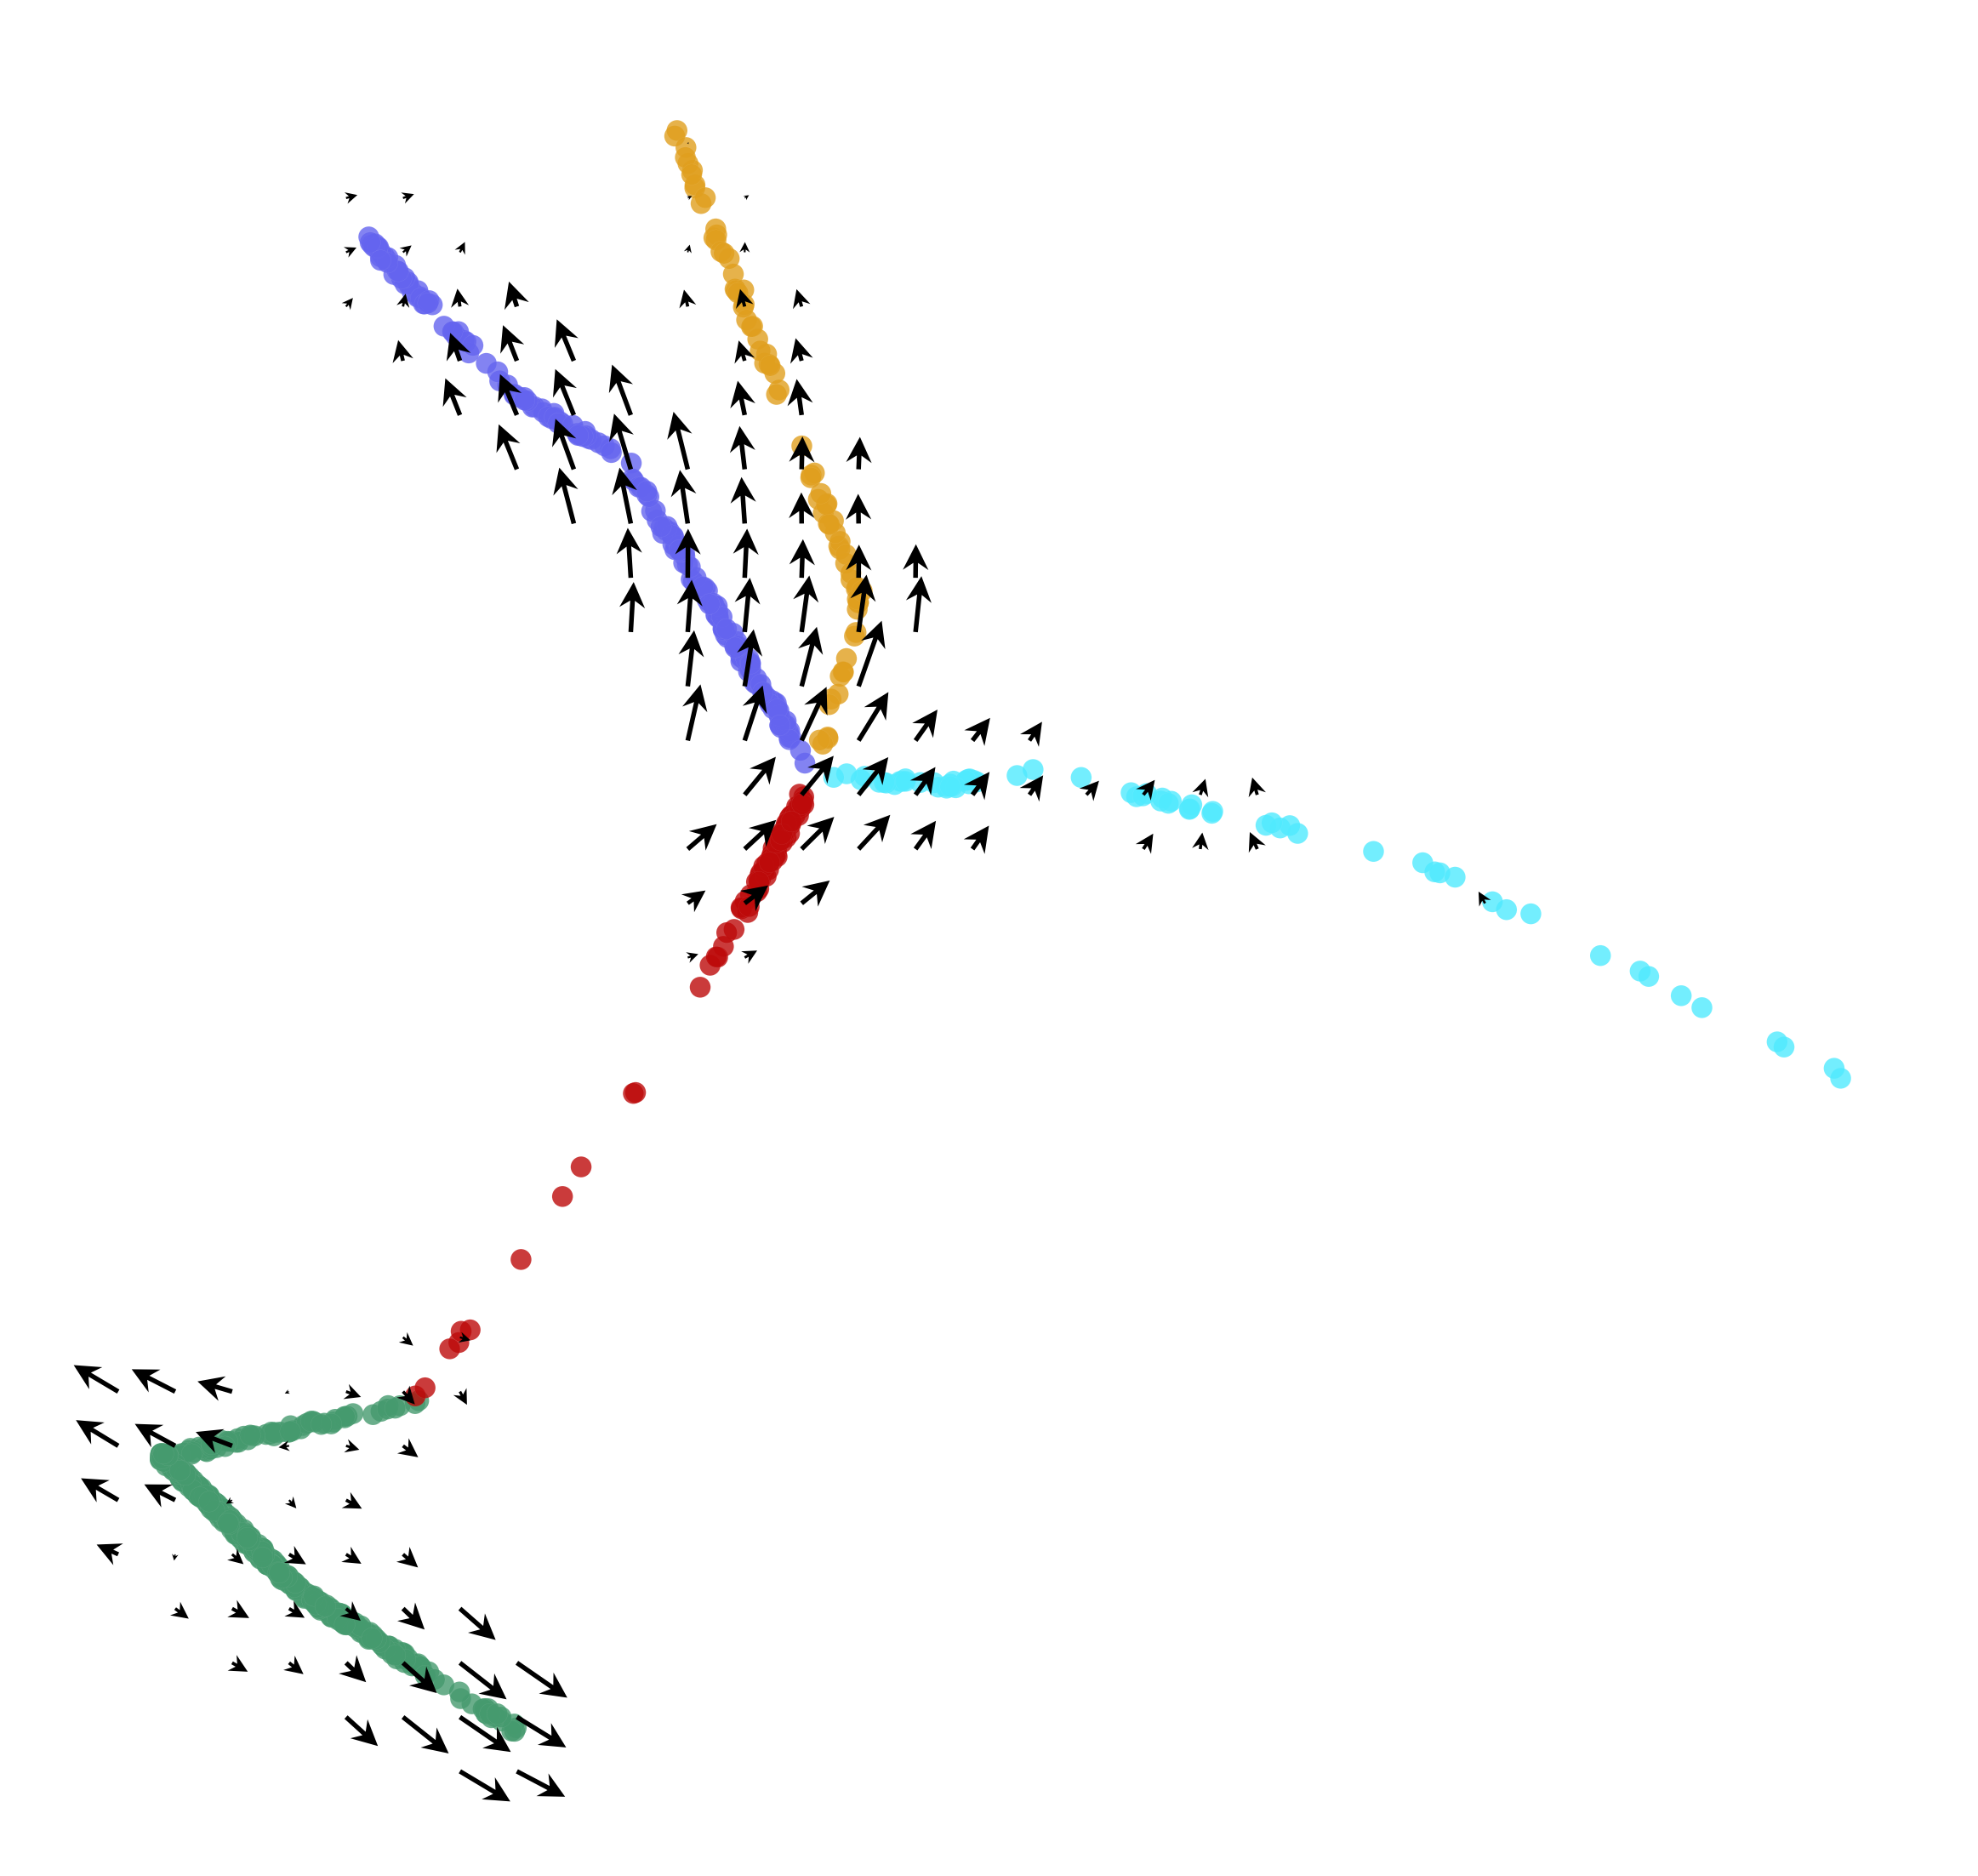

In [156]:
plt.figure(None,(90,40))
plt.subplot(121)
#plt.scatter(dfumapnc.iloc[:,0], dfumapnc.iloc[:,1] , alpha=0.8, c=newcolorsms[dfclus[dfumapnc.index].loc["Cluster"].values].values, s =600, lw=0.2)
vlm.plot_grid_arrows(quiver_scale=2,
                     scatter_kwargs_dict={"alpha":0.8, "lw":0.05, "edgecolor":"1", "s":600, "rasterized":True},
                     min_mass=1.5, 
                     angles='xy', 
                     scale_units='xy',
                     headaxislength=4, headlength=5.5, headwidth=5.5, minlength=0.01,
                     plot_dots=True,
                     plot_random=False, 
                     #scale_type="relative"
                    )

/root/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


2021-03-02 14:07:46,581 - DEBUG - update_title_pos
2021-03-02 14:07:46,655 - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/root/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
2021-03-02 14:07:46,690 - DEBUG - update_title_pos
2021-03-02 14:07:49,622 - DEBUG - update_title_pos
2021-03-02 14:07:49,643 - DEBUG - update_title_pos
2021-03-02 14:07:49,667 - DEBUG - update_title_pos
2021-03-02 14:07:49,682 - DEBUG - update_title_pos
2021-03-02 14:07:49,814 - DEBUG - update_title_pos
2021-03-02 14:07:49,924 - DEBUG - update_title_pos


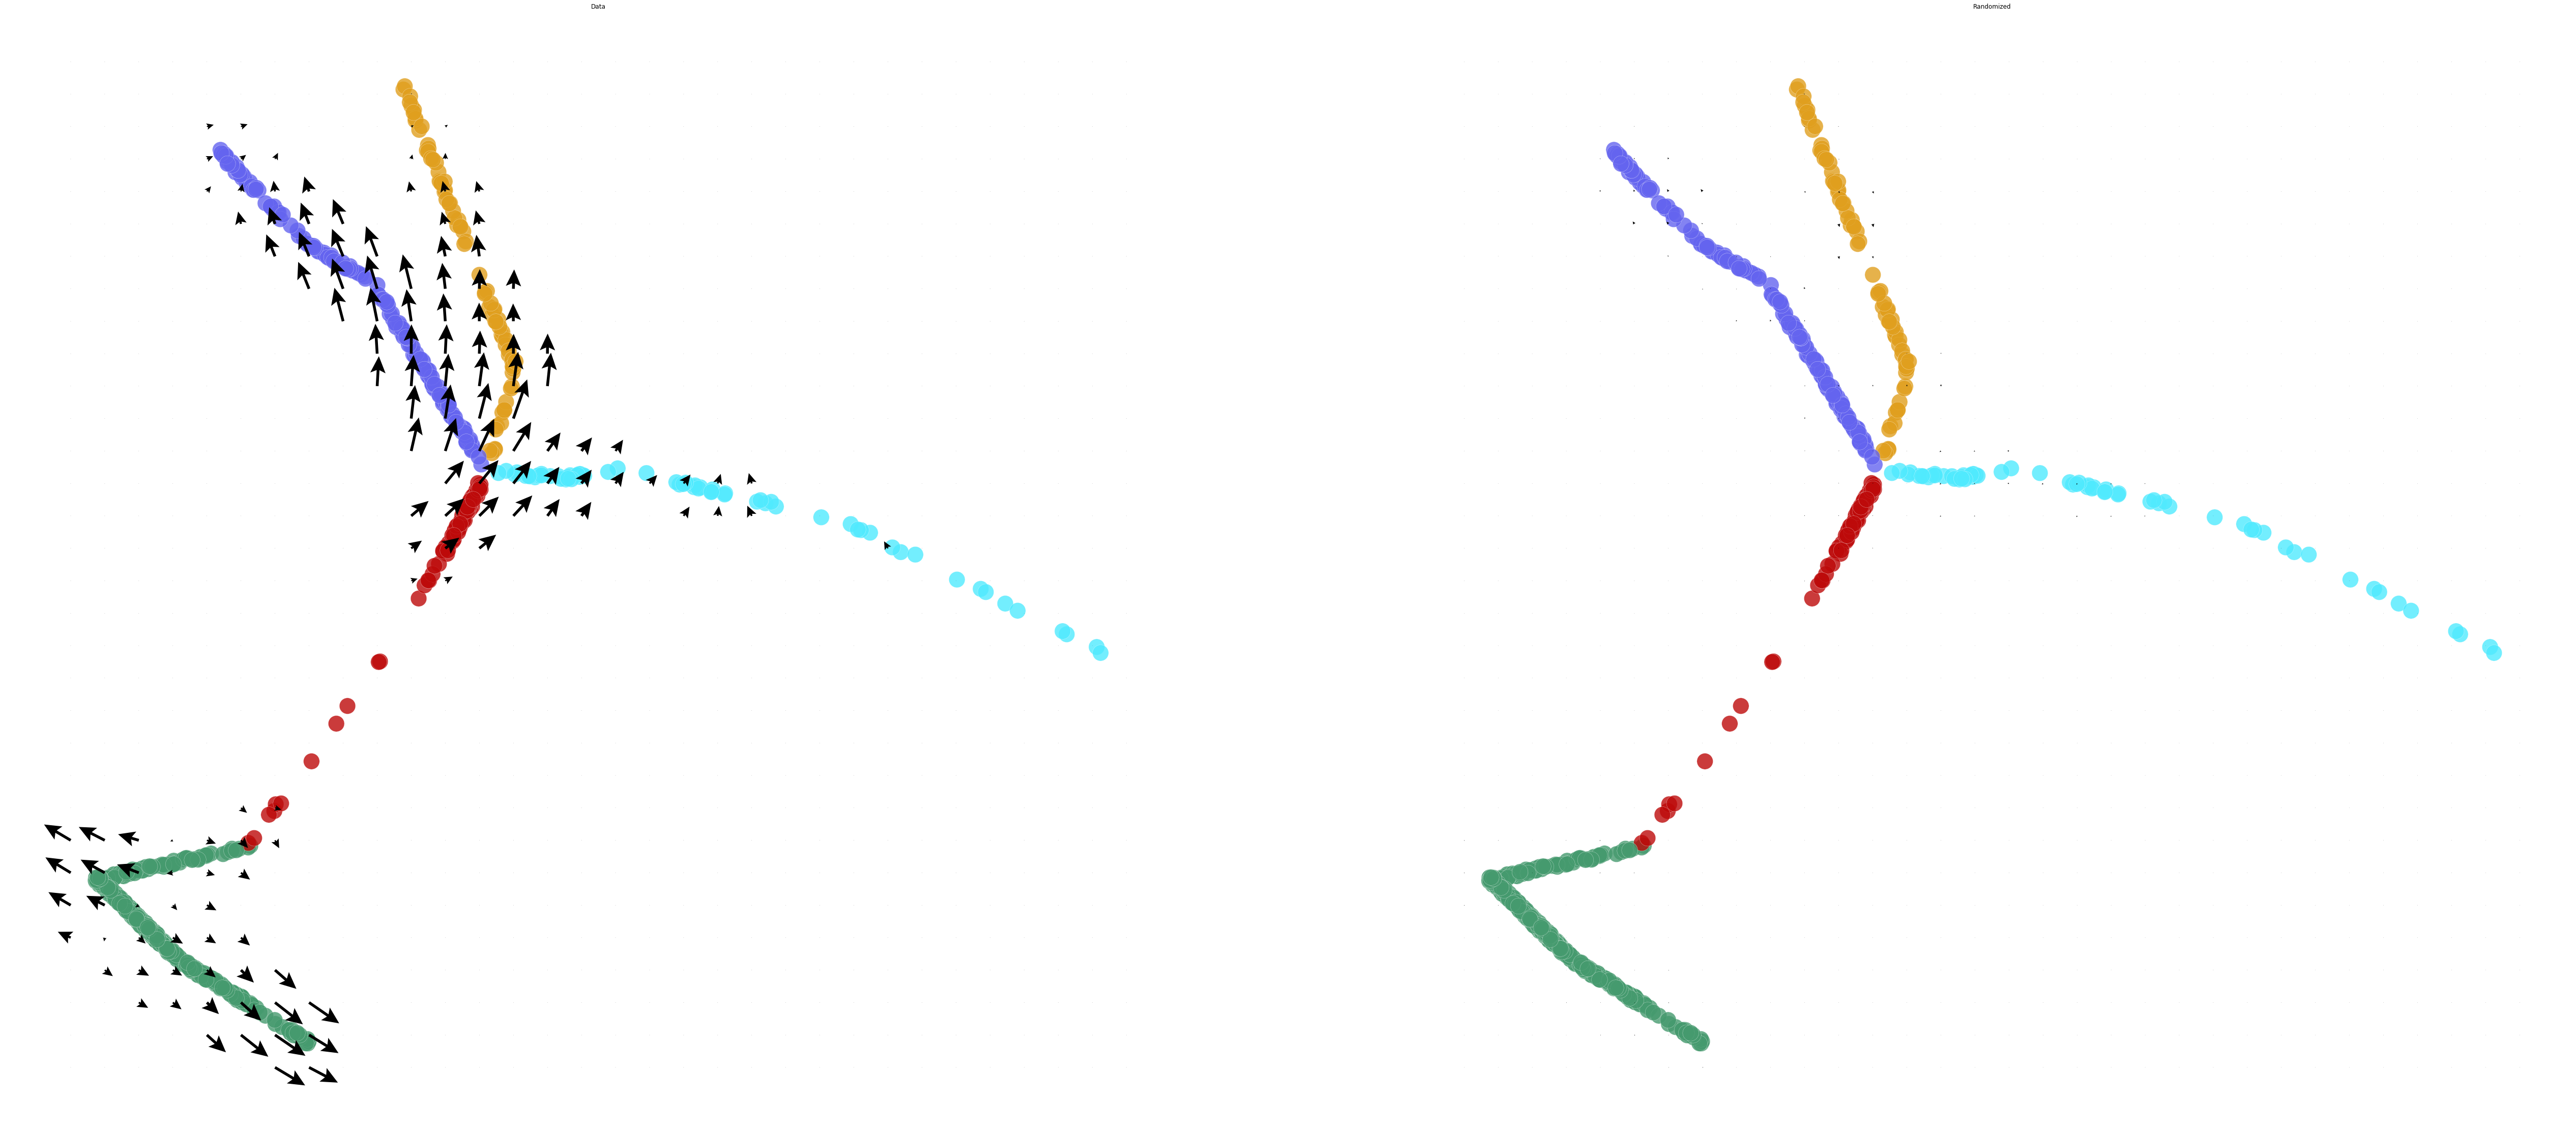

In [158]:
plt.figure(None,(90,40))
plt.subplot(121)
#plt.scatter(dfumapnc.iloc[:,0], dfumapnc.iloc[:,1] , alpha=0.8, c=newcolorsms[dfclus[dfumapnc.index].loc["Cluster"].values].values, s =600, lw=0.2)
vlm.plot_grid_arrows(quiver_scale=2,
                     scatter_kwargs_dict={"alpha":0.8, "lw":0.35, "edgecolor":"1", "s":1000, "rasterized":True},
                     min_mass=1.5, angles='xy', scale_units='xy',
                     headaxislength=5, headlength=6, headwidth=5.5, minlength=0.1,plot_dots=True,
                     plot_random=True, scale_type="relative")

2021-03-02 14:08:03,455 - DEBUG - update_title_pos
2021-03-02 14:08:03,551 - DEBUG - update_title_pos
2021-03-02 14:08:03,578 - DEBUG - update_title_pos
2021-03-02 14:08:03,592 - DEBUG - update_title_pos


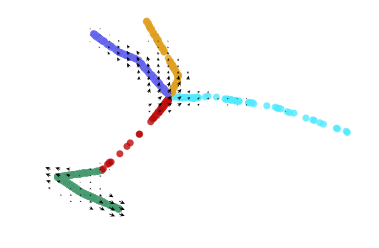

In [160]:
vlm.plot_grid_arrows(quiver_scale=3,
                     scatter_kwargs_dict={"alpha":0.8, "lw":0.05, "edgecolor":"1", "s":50, "rasterized":True},
                     min_mass=1.5, 
                     angles='xy', scale_units='xy',
                     headaxislength=4, headlength=6, headwidth=5.5, minlength=0.1,plot_dots=True,
                     plot_random=False, scale_type="relative")

In [161]:
vlm.embedding[:, 0]

array([ -9.27303246,  -6.35246618,  -6.32628072, ..., -11.75026395,
       -22.27923919, -22.38630988])

In [162]:
vlm.delta_embedding[:, 0]

array([-0.01591875, -0.0157841 ,  0.00512982, ..., -0.13540969,
       -0.62934034,  0.05523065])

(-24.515564224303883,
 22.796848031468663,
 -22.834403883747875,
 28.270461856762754)

2021-03-02 14:09:57,689 - DEBUG - update_title_pos
2021-03-02 14:09:58,074 - DEBUG - update_title_pos
2021-03-02 14:09:58,111 - DEBUG - update_title_pos
2021-03-02 14:09:58,127 - DEBUG - update_title_pos


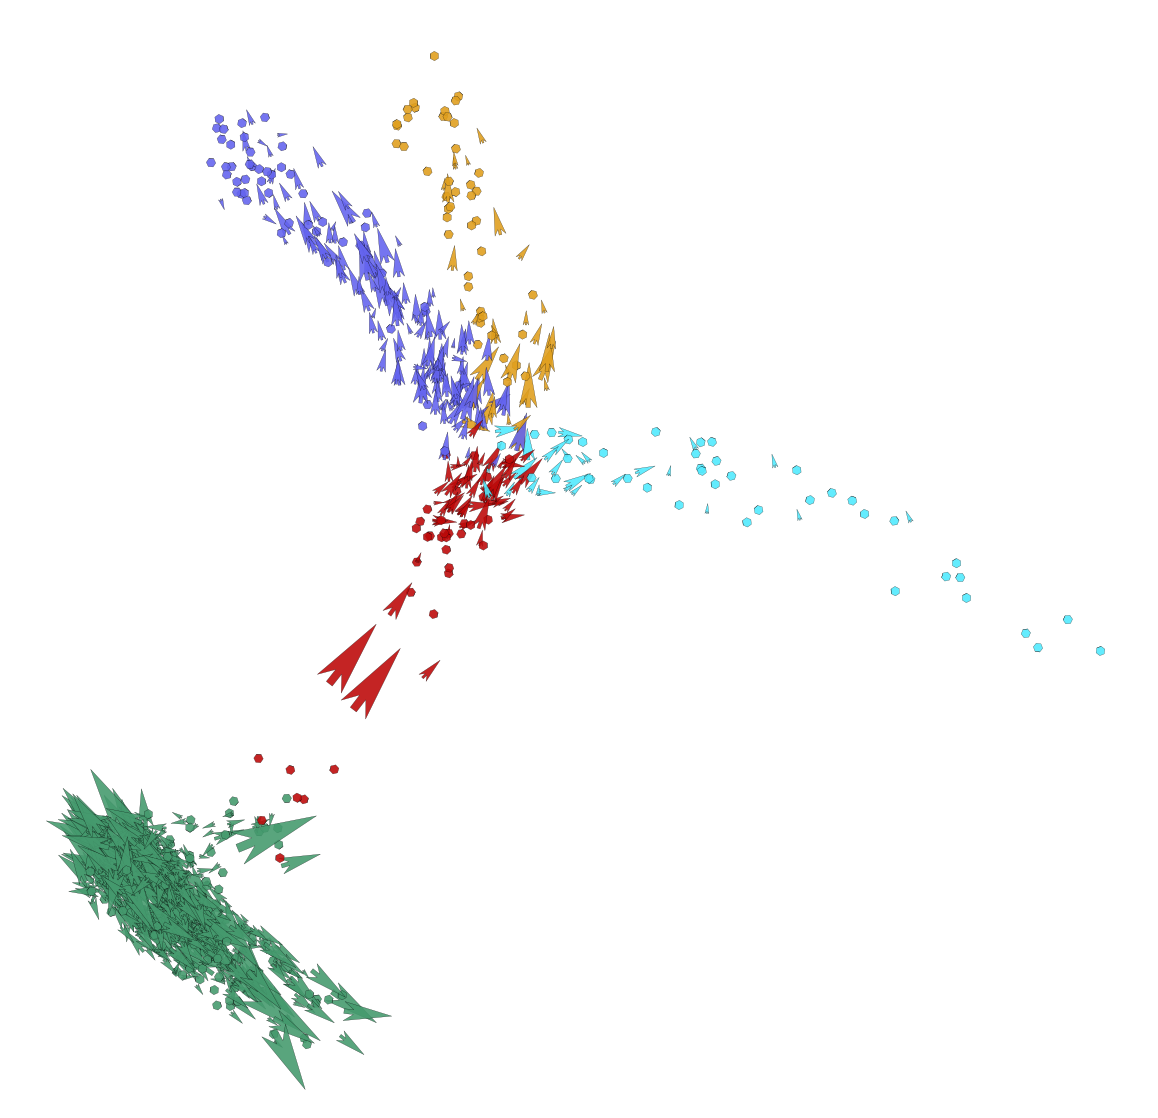

In [168]:
plt.figure(None,(20,20))
quiver_scale = 15

#plt.scatter(vlm.embedding[:, 0], vlm.embedding[:, 1],
#            c="0.8", alpha=0.4, s=100, edgecolor="")

#ix_choice = np.random.choice(vlm.embedding.shape[0], size=int(vlm.embedding.shape[0]/1.), replace=False)
#plt.scatter(xtest, ytest , alpha=0.8, c=newcolorsms[bool00ms,:], s=100, edgecolor="k", linewidths=0.65, rasterized=True)
#plt.scatter(vlm.embedding[:, 0], vlm.embedding[:, 1],
 #           c="0.8", alpha=0.8, s=100, edgecolor=(0,0,0,1), lw=0.2,rasterized=True)

quiver_kwargs=dict(headaxislength=8, headlength=10, headwidth=4,
                   linewidths=0.25, 
                   width=0.0085,edgecolors="k", color= vlm.colorandum, alpha=0.89)
plt.quiver(vlm.embedding[:, 0]+np.random.choice(1000, 1220)/300,vlm.embedding[:, 1]+np.random.choice(1000, 1220)/300,
           vlm.delta_embedding[:, 0], vlm.delta_embedding[:, 1],
           scale=quiver_scale, **quiver_kwargs)

plt.axis("off")